# Sample Model

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from easydynamics.sample_model import BrownianTranslationalDiffusion
from easydynamics.sample_model import ComponentCollection
from easydynamics.sample_model import DampedHarmonicOscillator
from easydynamics.sample_model import Gaussian
from easydynamics.sample_model import Polynomial
from easydynamics.sample_model.background_model import BackgroundModel
from easydynamics.sample_model.resolution_model import ResolutionModel
from easydynamics.sample_model.sample_model import SampleModel

%matplotlib widget

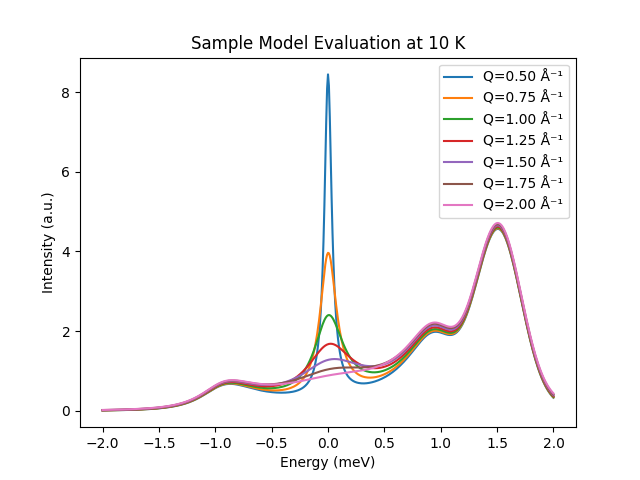

In [2]:
# Create a diffusion_model and components for the SampleModel
Q = np.linspace(0.5, 2, 7)
energy = np.linspace(-2, 2, 501)

scale = 1.0
diffusion_coefficient = 2.4e-9  # m^2/s
diffusion_unit = 'm**2/s'
diffusion_model = BrownianTranslationalDiffusion(
    display_name='DiffusionModel',
    scale=scale,
    diffusion_coefficient=diffusion_coefficient,
    diffusion_unit=diffusion_unit,
)


# Creating components
component_collection = ComponentCollection()
gaussian = Gaussian(display_name='Gaussian', width=0.2, area=1, center=1.5)
dho = DampedHarmonicOscillator(display_name='DHO', center=1.0, width=0.3, area=2.0)

# Adding components to the component collection
component_collection.append_component(gaussian)
component_collection.append_component(dho)

sample_model = SampleModel(
    diffusion_models=diffusion_model,
    components=component_collection,
    Q=Q,
    unit='meV',
    display_name='MySampleModel',
    temperature=10,
)

# Calculate the model intensity at the specified Q and energy values
# y_list will be a list of intensity arrays, one for each Q value
sample_intensity = sample_model.evaluate(energy)

plt.figure()
for i, Q_value in enumerate(Q):
    plt.plot(energy, sample_intensity[i], label=f'Q={Q_value:.2f} Å⁻¹')
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (a.u.)')
plt.title('Sample Model Evaluation at 10 K')
plt.legend()
plt.show()

In [3]:
# Create a BackgroundModel and show other ways to set Q and components

background_model = BackgroundModel()
background_model.Q = Q

background_model.components = Polynomial(coefficients=[1, 0.1, 0.01])
background = background_model.evaluate(energy)

# Also create a ResolutionModel.
# It doesn't do anything here, but shows how to set it up.
resolution_model = ResolutionModel()
resolution_model.Q = Q
resolution_model.append_component(Gaussian(width=0.05))
resolution = resolution_model.evaluate(energy)

/home/runner/work/dynamics-lib/dynamics-lib/src/easydynamics/sample_model/model_base.py:206: UserWarning: Q is not set. No component collections generated
  warnings.warn('Q is not set. No component collections generated', UserWarning)


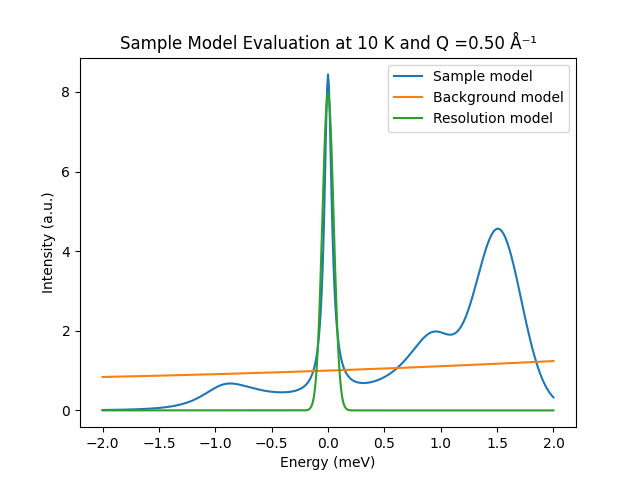

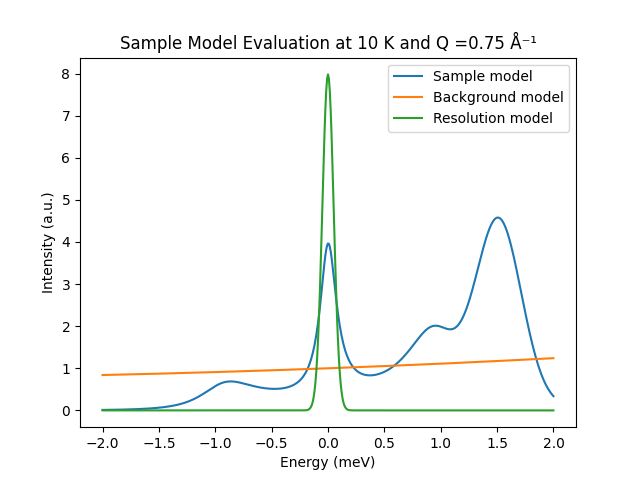

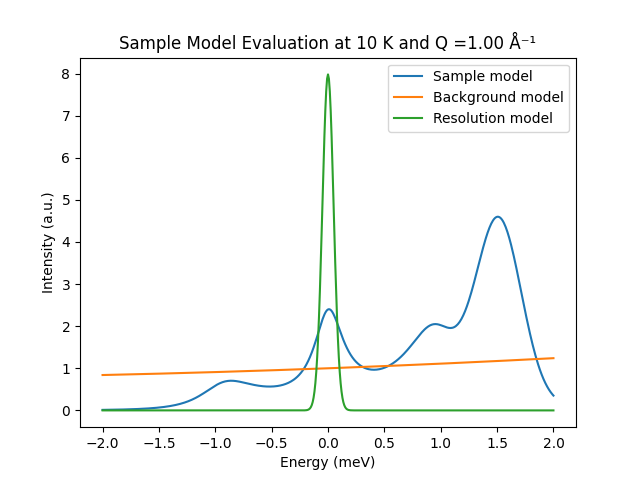

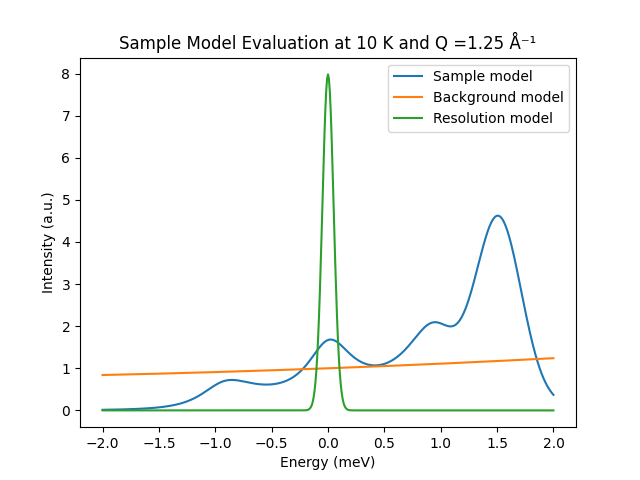

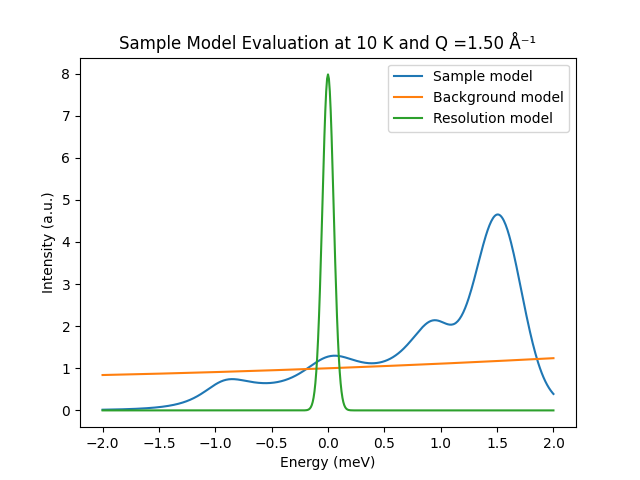

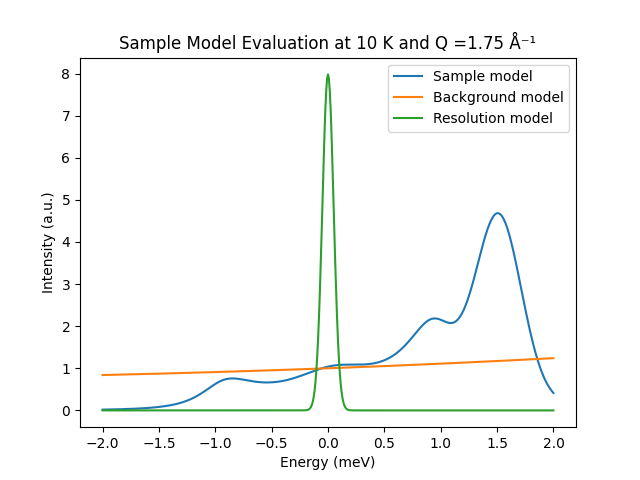

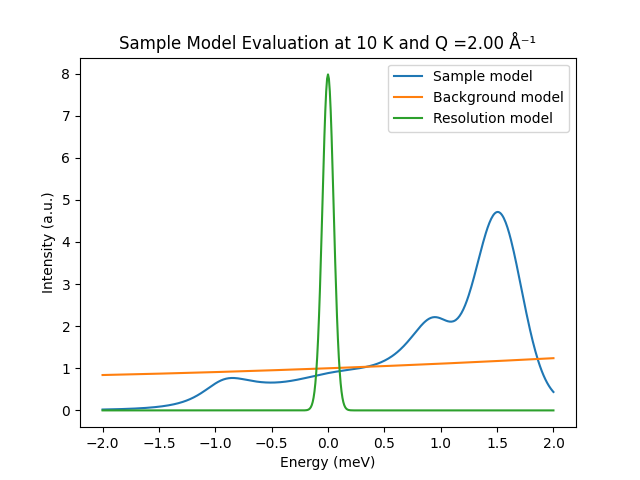

In [4]:
# Plot the three models together
for i, Q_value in enumerate(Q):
    plt.figure()
    plt.plot(energy, sample_intensity[i], label='Sample model')
    plt.plot(energy, background[i], label='Background model')
    plt.plot(energy, resolution[i], label='Resolution model')
    plt.legend()
    plt.xlabel('Energy (meV)')
    plt.ylabel('Intensity (a.u.)')
    plt.title(f'Sample Model Evaluation at 10 K and Q ={Q_value:.2f} Å⁻¹')
    plt.legend()
    plt.show()